In [6]:
library(tidyverse)
library(ggalluvial)

In [3]:
read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018-11-20/thanksgiving_meals.csv')  ->
thanksg

Parsed with column specification:
cols(
  .default = col_character(),
  id = col_double()
)
See spec(...) for full column specifications.


In [5]:
thanksg  %>% head()

id,celebrate,main_dish,main_dish_other,main_prep,main_prep_other,stuffing,stuffing_other,cranberry,cranberry_other,...,hometown_friends,friendsgiving,black_friday,work_retail,work_black_friday,community_type,age,gender,family_income,us_region
4337954960,Yes,Turkey,NA,Baked,NA,Bread-based,NA,None,NA,...,Yes,No,No,No,NA,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
4337951949,Yes,Turkey,NA,Baked,NA,Bread-based,NA,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NA,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
4337935621,Yes,Turkey,NA,Roasted,NA,Rice-based,NA,Homemade,NA,...,Yes,Yes,Yes,No,NA,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
4337933040,Yes,Turkey,NA,Baked,NA,Bread-based,NA,Homemade,NA,...,Yes,No,No,No,NA,Urban,30 - 44,Male,"$200,000 and up",Pacific
4337931983,Yes,Tofurkey,NA,Baked,NA,Bread-based,NA,Canned,NA,...,Yes,No,No,No,NA,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific
4337929779,Yes,Turkey,NA,Roasted,NA,Rice-based,NA,Homemade,NA,...,Yes,Yes,Yes,No,NA,Urban,18 - 29,Male,"$0 to $9,999",Pacific


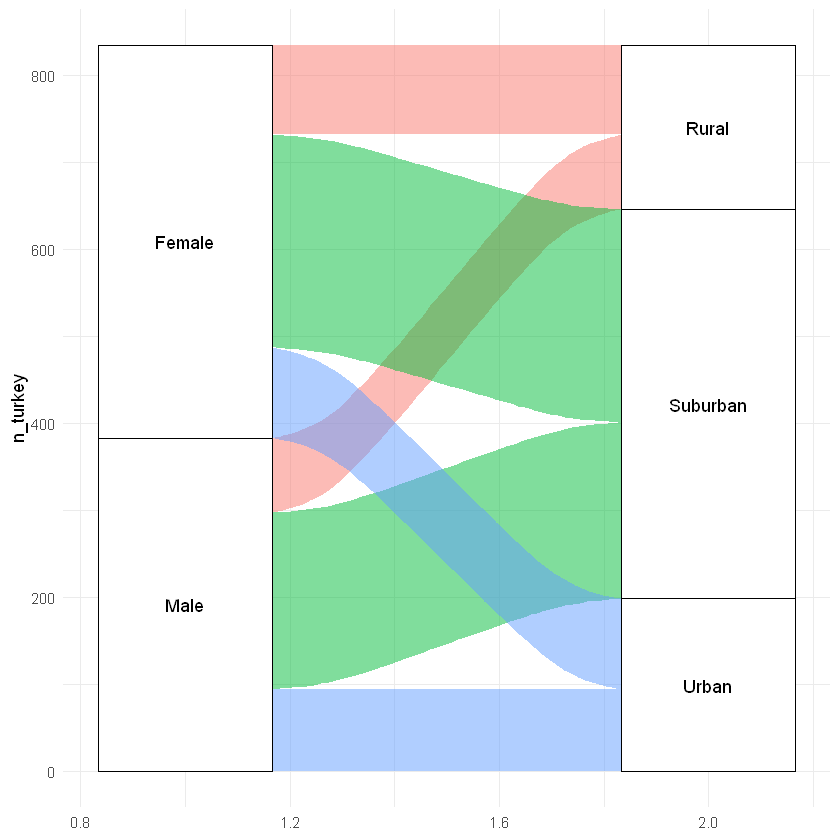

In [25]:
thanksg  %>% 
    select(gender, community_type, main_dish)  %>% 
    na.omit()  %>% 
    group_by(gender, community_type)  %>% 
    summarize(n_turkey = sum(main_dish == 'Turkey', na.rm = TRUE))  %>% 
    ggplot(aes(axis1 = gender, axis2 = community_type, y = n_turkey)) +
    geom_alluvium(aes(fill = community_type)) +
    geom_stratum() +
    geom_text(stat = 'stratum',
    label.strata = TRUE) + 
    theme_minimal() +
    guides(fill = FALSE)